In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd

In [25]:
gen_event_ = "ttbar-500"
outfile_ = "outfile-" + gen_event_ + ".root"
data_ = uproot.open(outfile_)["ntuples"]["tree"]
data_.keys()

['nevent',
 'nlumi',
 'nrun',
 'trackEta',
 'trackPhi',
 'qoverp',
 'dxy',
 'dsz',
 'trackPt',
 'trackTPIdx',
 'trackEtaError',
 'trackPhiError',
 'qoverpError',
 'dxyError',
 'dszError',
 'trackPtError',
 'trackParameters',
 'covarianceArray',
 'stereoHitX',
 'stereoHitY',
 'stereoHitZ',
 'stereoHitR',
 'stereoHitPhi',
 'stereoHitEta',
 'stereoHitLayer',
 'stereoTPIndex',
 'stereoHitMatch',
 'monoHitX',
 'monoHitY',
 'monoHitZ',
 'monoHitR',
 'monoHitPhi',
 'monoHitEta',
 'monoHitLayer',
 'monoTPIndex',
 'monoHitMatch']

In [26]:
from mpl_toolkits.mplot3d import Axes3D

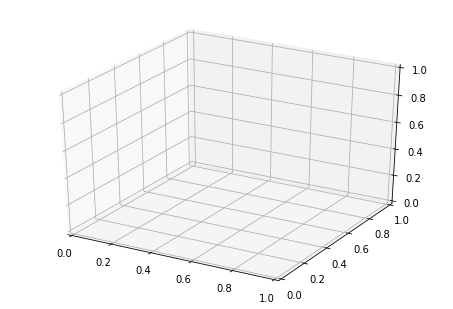

In [27]:
fig_ = plt.figure()
ax_ = Axes3D(fig_)

In [28]:
# Find Number of Events based on any property length
track_eta_ = data_.array("trackEta")
print "Number of Events: ", len(track_eta_)

Number of Events:  500


Iterating over trackEta from 28485 tracks


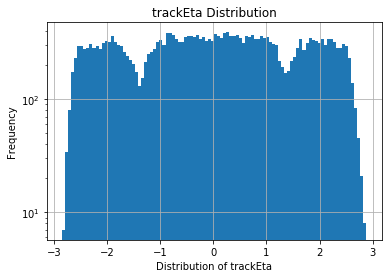

Iterating over trackPhi from 28485 tracks


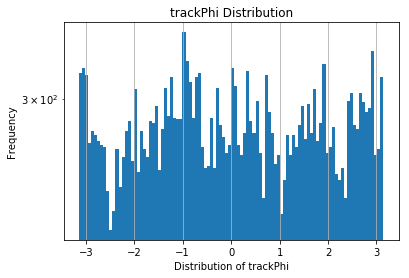

Iterating over qoverp from 28485 tracks


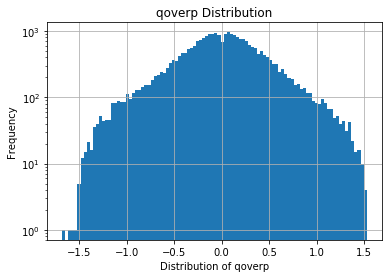

Iterating over dxy from 28485 tracks


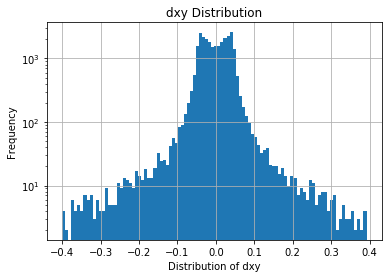

Iterating over dsz from 28485 tracks


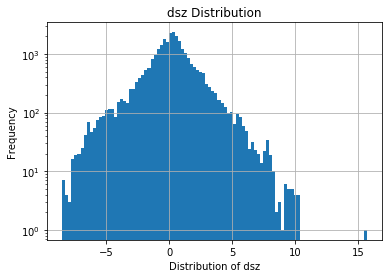

Iterating over trackPt from 28485 tracks


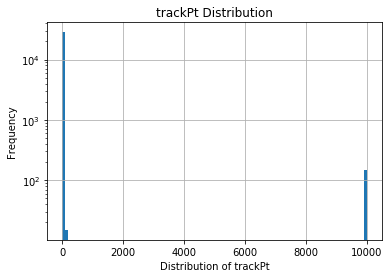

In [29]:
# Iterate over 5 track parameters and plot their distribution
for i, key in zip(range(6), ["trackEta", "trackPhi", "qoverp", "dxy", "dsz", "trackPt"]):
    track_param_ = data_.array(key)
    concat_track_param_ = []
    
    for j in range(len(track_param_)):
        concat_track_param_.extend(track_param_[j])
    print "Iterating over", key, "from", len(concat_track_param_), "tracks"
    
    plt.clf()
    ax_ = plt.subplot()
    ax_.hist(concat_track_param_, histtype='stepfilled', bins=100, orientation='vertical')
    plt.grid(True)
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xlabel('Distribution of ' + key)
    plt.title(key + ' Distribution')
    plt.savefig('plots/' + gen_event_ + '/track/' + key)
    plt.show()

15824


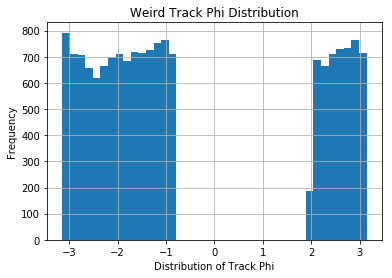

In [30]:
# Check what is causing trackPhi aberrations

track_phi_ = data_.array('trackPhi')
concat_track_phi_ = []
anomalous_phi_event_number_ = []
for i in range(len(track_phi_)):
    
    for j in range(len(track_phi_[i])):
        if (track_phi_[i][j] >= -0.8) and (track_phi_[i][j] <= 2):
            anomalous_phi_event_number_.append(i)
            continue
        else:    
            concat_track_phi_.append(track_phi_[i][j])
        
print len(concat_track_phi_)
ax_ = plt.subplot()
ax_.hist(concat_track_phi_, histtype='stepfilled', bins=40, orientation='vertical')
plt.grid(True)
plt.ylabel('Frequency')
plt.xlabel('Distribution of Track Phi')
plt.title('Weird Track Phi Distribution')
plt.show()

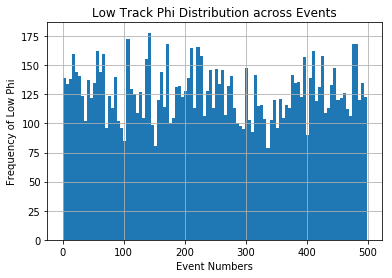

In [31]:
# Plot histogram of events with oddly low track phi
check_events_with_odd_phi_ = np.bincount(anomalous_phi_event_number_)
index_of_weird_events_ = range(len(check_events_with_odd_phi_))
# print anomalous_phi_event_number_
ax_ = plt.subplot()
ax_.hist(index_of_weird_events_, weights=check_events_with_odd_phi_, bins=100, orientation='vertical')
plt.grid(True)
plt.ylabel('Frequency of Low Phi')
plt.xlabel('Event Numbers')
plt.title('Low Track Phi Distribution across Events')
plt.show()

Added 28485 tracks from 500 events


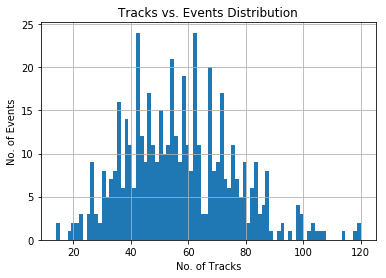

In [32]:
# Plot the distribution of tracks in events 
# using the length of any paramater array - e.g. track eta

track_Eta_ = data_.array("trackEta")
concat_num_tracks_ = []

for i in range(len(track_Eta_)):
     concat_num_tracks_.append(len(track_Eta_[i]))
print "Added", sum(concat_num_tracks_), "tracks from", len(concat_num_tracks_), "events"
ax_ = plt.subplot()
ax_.hist(concat_num_tracks_, histtype='bar', bins=80, align='mid', orientation='vertical')

plt.xlabel('No. of Tracks')
plt.ylabel('No. of Events')
plt.title('Tracks vs. Events Distribution')
plt.grid(True)
plt.savefig('plots/' + gen_event_ + '/track/event-track-distribution')
plt.show()

In [33]:
# TODO: Look at whether the same/similar event is getting replicated multiple times

<Figure size 432x288 with 0 Axes>

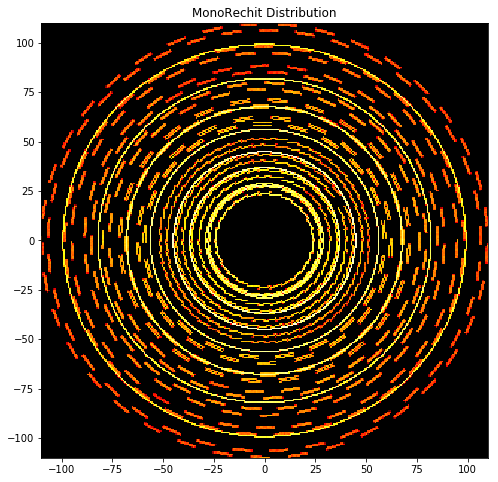

In [34]:
# ToDo: Add lognorm colormap

mono_x_ = data_.array("monoHitX") 
mono_y_ = data_.array("monoHitY")
mono_z_ = data_.array("monoHitZ")

if len(mono_x_) == len(mono_y_):
    concat_mono_x_ = []
    concat_mono_y_ = []

    for i in range(len(mono_x_)):
        concat_mono_x_.extend(mono_x_[i])
        concat_mono_y_.extend(mono_y_[i])

plt.clf()
fig, ax_ = plt.subplots(figsize=(8, 8))
# Plot the 2D Histogram for Mono Rechits
plt.title('MonoRechit Distribution')
ax_.patch.set_facecolor('black')
plt.hist2d(concat_mono_x_, concat_mono_y_, bins=300, norm=matplotlib.colors.LogNorm(), cmap='hot')
plt.savefig('plots/' + gen_event_ + '/stereo/rechitdistribution')
plt.show()

<Figure size 432x288 with 0 Axes>

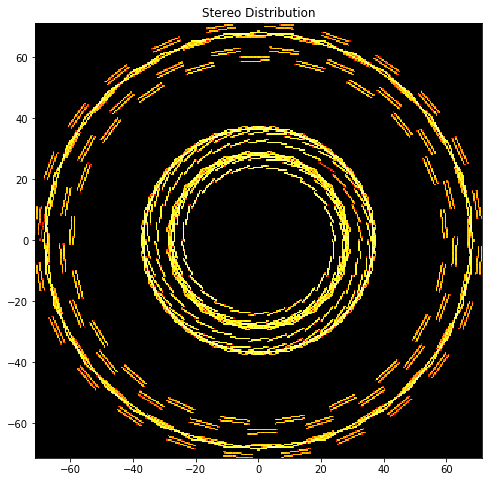

In [35]:
# ToDo: Add lognorm colormap

stereo_x_ = data_.array("stereoHitX") 
stereo_y_ = data_.array("stereoHitY")
stereo_z_ = data_.array("stereoHitZ")

if len(mono_x_) == len(mono_y_):
    concat_stereo_x_ = []
    concat_stereo_y_ = []

    for i in range(len(mono_x_)):
        concat_stereo_x_.extend(stereo_x_[i])
        concat_stereo_y_.extend(stereo_y_[i])

plt.clf()
fig, ax_ = plt.subplots(figsize=(8, 8))
# Plot the 2D Histogram for Mono Rechits
ax_.set_title('Stereo Distribution')
ax_.patch.set_facecolor('black')
ax_.hist2d(concat_stereo_x_, concat_stereo_y_, bins=300, norm=matplotlib.colors.LogNorm(), cmap='hot')
plt.savefig('plots/' + gen_event_ + '/stereo/rechitdistribution')
plt.show()

<Figure size 432x288 with 0 Axes>

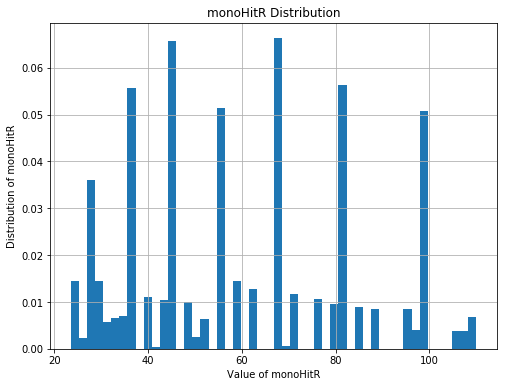

<Figure size 432x288 with 0 Axes>

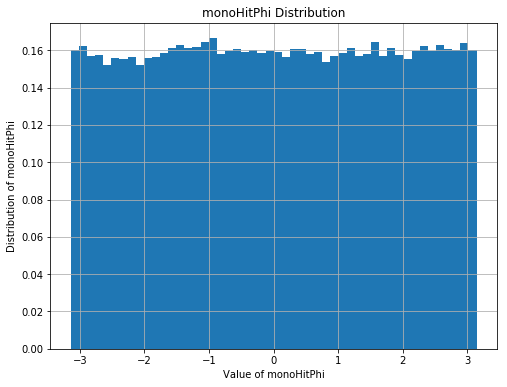

<Figure size 432x288 with 0 Axes>

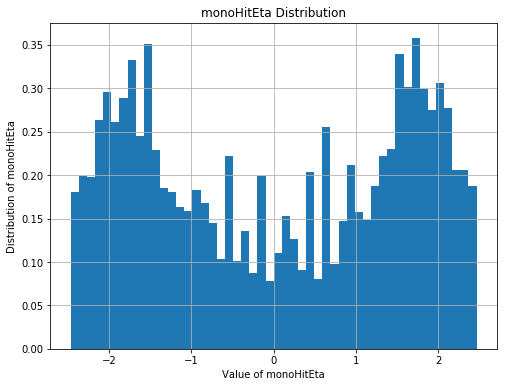

In [36]:
# Define a loop that plots R, Phi, and Eta for Mono Hits
position_ = 1
for param in ["monoHitR", "monoHitPhi", "monoHitEta"]:
    mono_param_ = data_.array(param)
    concat_mono_param_ = []
    
    for i in range(len(mono_param_)):
            concat_mono_param_.extend(mono_param_[i])

    plt.clf()
    fig, ax_ = plt.subplots(figsize=(8, 6))
    position_ += 1
    # Plot the 2D Histogram for Mono Rechits
    ax_.set_title('MonoRechit Distribution of ' + param)
    ax_.hist(concat_mono_param_, bins=50, histtype='stepfilled', align='mid', orientation='vertical', density=True)
    plt.xlabel('Value of ' + param)
    plt.ylabel('Distribution of ' + param)
    plt.title(param + ' Distribution')
    plt.grid(True)
    plt.savefig('plots/' + gen_event_ + '/mono/' + param)
    plt.show()

<Figure size 432x288 with 0 Axes>

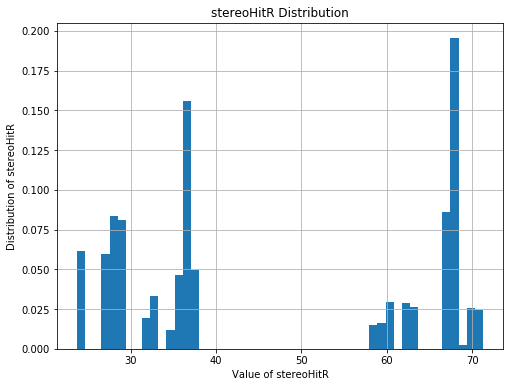

<Figure size 432x288 with 0 Axes>

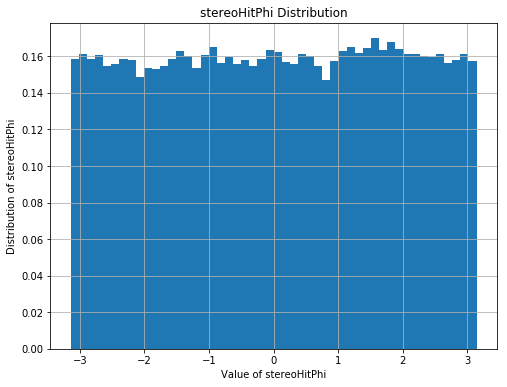

<Figure size 432x288 with 0 Axes>

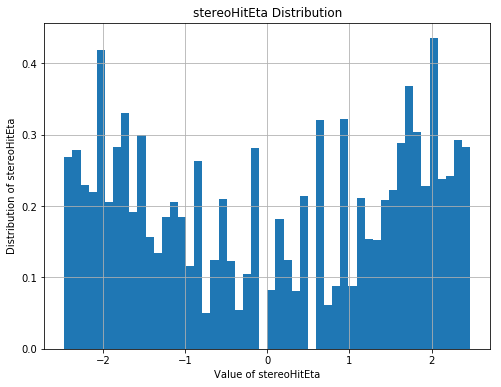

In [37]:
# Define a loop that plots R, Phi, and Eta for Stereo Hits

for param in ["stereoHitR", "stereoHitPhi", "stereoHitEta"]:
    stereo_param_ = data_.array(param)
    concat_stereo_param_ = []
    
    for i in range(len(mono_param_)):
            concat_stereo_param_.extend(stereo_param_[i])

    plt.clf()
    fig, ax_ = plt.subplots(figsize=(8, 6))
    position_ += 1
    # Plot the 2D Histogram for Mono Rechits
    ax_.set_title('StereoRechit Distribution of ' + param)
    ax_.hist(concat_stereo_param_, bins=50, histtype='stepfilled', align='mid', orientation='vertical', density=True)
    plt.xlabel('Value of ' + param)
    plt.ylabel('Distribution of ' + param)
    plt.title(param + ' Distribution')
    plt.grid(True)
    plt.savefig('plots/' + gen_event_ + '/stereo/' + param)
    plt.show()

In [38]:
stereo_tp_idx_ = data_.array('stereoTPIndex')
mono_tp_idx_ = data_.array('monoTPIndex')
track_tp_idx_ = data_.array('trackTPIdx')

# Check that both have been generated for the same number of events
# Just for clarity
print len(track_tp_idx_) == len(stereo_tp_idx_),
print len(track_tp_idx_) == len(mono_tp_idx_),
print "\nTotal", len(track_tp_idx_), "events"

True True 
Total 500 events


In [39]:
# Check if any tracks map to multiple tracking particles
for i in range(len(track_tp_idx_)):
    for track_tp_list_ in track_tp_idx_[i]:
        if len(track_tp_list_) > 1:
            print "Track maps to multiple TPs in event", i

In [ ]:
# Check if any hits map to multiple tracking particles
# It is NOT NECESSARY that these TPs map to actual tracks
%%time
hit_tp_count_ = {}

# Iterate over event length in mono and stereo rechits
for event_ in range(len(stereo_tp_idx_)):
    for stereo_tp_list_ in stereo_tp_idx_[event_]:
        tp_len_ = len(stereo_tp_list_)
        # Add to a dictionary of <num of TP matches : hit count>
        if tp_len_ in hit_tp_count_:
            hit_tp_count_[tp_len_] += 1
        else:
            hit_tp_count_[tp_len_] = 1
    
    for mono_tp_list_ in mono_tp_idx_[event_]:
        tp_len_ = len(mono_tp_list_)
        # Add to a dictionary of <num of TP matches : hit count>
        if tp_len_ in hit_tp_count_:
            hit_tp_count_[tp_len_] += 1
        else:
            hit_tp_count_[tp_len_] = 1

# This prints how many hits map to multiple matches
# <num matches to TPs: ncount of hits>
print "Number of matches and number of hits with those many TP matches\n", hit_tp_count_

In [ ]:
# NEEDS OPTIMIZATION - RUNS FOREVER
# 3D Dataframes better?
%% time
# Check how many rechits map to actual tracks?

# Iterate over event length in mono and stereo rechits
for event_ in range(len(stereo_tp_idx_)):
    for stereo_tp_list_ in stereo_tp_idx_[event_]:
        count_ = 0
        for track_tp_list_ in track_tp_idx_[event_]:    
            if len([idx_set_ for idx_set_ in stereo_tp_list_ if idx_set_ in track_tp_list_]) > 0:
                count_ += 1
        if hit_tp_count_[count_]:
            hit_tp_count_[count_] += 1
        else:
            hit_tp_count_[count_] = 1
    #print "Track Matches Stereo:", count_
    
    for mono_tp_list_ in mono_tp_idx_[event_]:
        count_ = 0
        for track_tp_list_ in track_tp_idx_[event_]:    
            if len([idx_set_ for idx_set_ in mono_tp_list_ if idx_set_ in track_tp_list_]) > 0:
                count_ += 1
        if hit_tp_count_[count_]:
            hit_tp_count_[count_] += 1
        else:
            hit_tp_count_[count_] = 1
    #print "Track Matches Mono:", count_
    
# This prints how many hits map to actual (including multiple) track matches
# <num matches to Tracks: count of hits>
print "Number of matches and number of hits with those many Track matches\n", hit_tp_count_                

In [42]:
# Check that the same number of entries are recorded for stereo rechits
concat_stereo_tp_idx_ = []
for i in range(len(stereo_tp_idx_)):
    concat_stereo_tp_idx_.extend(stereo_tp_idx_[i])
    
print len(concat_stereo_tp_idx_) == len(concat_stereo_param_)

True


In [43]:
import pandas as pd

In [44]:
mono_hit_match_ = data_.array('monoHitMatch')
stereo_hit_match_ = data_.array('stereoHitMatch')

In [45]:
rechit_global_map_ = {"Event ID": [], "Rechit ID":[], "Unmatched Track TP Index":[], "Matched Track TP Index": []}
global_counter_ = 0

# Check that they have the same number of events 
if len(stereo_tp_idx_) == len(mono_tp_idx_):
    for event_ in range(len(stereo_tp_idx_)):
        for idx_ in range(len(stereo_tp_idx_[event_])):
            rechit_global_map_["Event ID"].append(event_)
            rechit_global_map_["Rechit ID"].append(global_counter_)
            rechit_global_map_["Matched"].append()
            
            rechit_global_map_["Track TP Index"].append(stereo_tp_idx_[event_][idx_])  

            global_counter_ += 1
else:
    print "Length of mono and stereo hits are a mismatch!"
    print "Some event has zero mono or stereo hits; is this normal?"

KeyError: 'Matched'

In [ ]:
global_counter_

In [ ]:

'''
Dataframe column titles and datatypes

:Event ID: int
:Rechit ID: int
:Track ID: int
:Rechit IDs: list(int)
:Track IDs: list(int)
:Matched/Unmatched Track TP Index: set(int)  # iterating over sets has lower complexity
:Rechit TP Index: set(int)  # iterating over sets has lower complexity
''' 

In [ ]:
# Define the dictionaries to be cast into dataframes

track_to_rechit_map_ = {"Event ID": [], "Track ID":[], "Track TP Index":[], "Rechit IDs":[], "Matched": []}
rechit_to_track_map_ = {"Event ID": [], "Rechit ID":[], "Rechit TP Index":[], "Track IDs":[], "Matched": []}

In [ ]:
# Initialize the Global Track ID
track_id_ = 0

for event_id_ in range(len(stereo_tp_idx_)):
    # Check the TPs matched to tracks and find rechits for each TP (Stereo and Mono)
    for track_tp_list_ in track_tp_idx_[event_id_]:
        
        # Find matches in stereo rechits within that event
        for stereo_tp_list_ in stereo_tp_idx_[event_id_]:
            matches_ = [idx_ for idx_ in track_tp_list_ if idx_ in stereo_tp_list_]
            if matches_:
                track_to_rechit_map_["Event ID"].append(event_id_)
                track_to_rechit_map_["Track ID"].append(track_id_)
                track_to_rechit_map_["Track TP Index"].append(track_tp_list_)
                
                # TODO: Assign each rechit a unique ID that you can retrieve easily
                track_to_rechit_map_["Rechit IDs"].append()
        
        
        # Increment the Global Track ID
        track_id_ += 1
            
    
    # Check the TPs matched to Rechits and find the tracks for each TP (Stereo and Mono)
    
    # Append to respective dictionaries and log the number of hits (Stereo and Mono)
    # Corroborate the counted number of matches with the hitmatch column data (Stereo and Mono)
    
    # TODO: Add Paremeters of these Rechits to a separate array

# Unique index associated with every single track

# If you do this, you add all the tracks sequentially 
# but when you want to search, it is not per-event so you 
# will lose the segregation of tracks by event
concat_track_tp_idx_ = {}
idx_ = 0

for event_ in range(len(track_tp_idx_)):
    for tp_list_ in track_tp_idx_[event_]:
        concat_track_tp_idx_[(event_, idx_)] = tp_list_
        idx_ += 1

track_count_ = len(concat_track_tp_idx_)
print track_count_, "total tracks found"

# Check how many tracks have multiple TPs
for key, value in concat_track_tp_idx_.items():
    # Track matched to >1 TP
    if len(value) > 1:
        print "Track", key, "matched to TPs", value

# Unique index associated with every single stereo rechit

# If you do this, you add all the stereo rechits sequentially 
# but when you want to search, it is not per-event so you 
# will lose the segregation of rechits by event
concat_stereo_tp_idx_ = {}
idx_ = 0

for event_ in range(len(stereo_tp_idx_)):
    for tp_list_ in stereo_tp_idx_[event_]:
        concat_stereo_tp_idx_[(event_, idx_)] = tp_list_
        idx_ += 1

stereo_count_ = len(concat_stereo_tp_idx_)
print stereo_count_, "total stereohits found"

# Check how many stereo hits have multiple TPs
for key, value in concat_stereo_tp_idx_.items():
    # Track matched to >1 TP
    if len(value) > 1:
        # Dictionaries are unordered by default so this won't be sorted by event index
        print "<Event, Hit Index>", key, "matched to TPs", value

concat_stereo_tp_idx_

matched_stereo_rechit_ = data_.array('stereoHitMatch')

# Iterate over all events and track indices to find a match for rechits

# Generate a map of rechit to indices of the tracks it matches
# rechit_to_track_map_ = {}
global_counter_ = 0

# For each event
for event_ in range(len(stereo_tp_idx_)):
    
    # Create a new list for all TP indices from tracks
    event_tp_list_ = []
    
    total_hits_ = len(stereo_tp_idx_[event_])
    
    # Tracks that correspond to a TP
    tp_matched_tracks_ = 0
    # Tracks that have rechits matched to them
    rechit_matched_tracks_ = 0
    # Total tracks in the event
    total_tracks_ = len(track_tp_idx_[event_])
    
    # Generate a list of all track TPs in the event
    for track_tp_list_ in track_tp_idx_[event_]:
        if len(track_tp_list_) > 0:
            event_tp_list_.extend(track_tp_list_)
            tp_matched_tracks_ += 1
            
    
    # Print the number of matched/total tracks to TPs in the event
    print tp_matched_tracks_, "/", total_tracks_, "tracks matched to", len(list(set(event_tp_list_))), "tracking particles"
    # TODO: Print rechits matched/total rechits
    
    # List all the tracks and TP lists for each track
    enum_track_tp_idx_ = enumerate(track_tp_idx_[event_])

    # For every index list in the stereo TP array
    for idx_list_ in stereo_tp_idx_[event_]:
        for idx_ in idx_list_:
            # Match is an array of track indices that matched the search idx
            match_ = [track_num_ for track_num_, tp_list_ in enum_track_tp_idx_ if idx_ in tp_list_]
            
            if match_:
                for track_num_ in match_:
                    if (event_, idx_) in rechit_to_track_map_:
                        rechit_to_track_map_[(event_, idx_)].append([global_counter_])
                        global_counter_ += 1
                    else:
                        rechit_to_track_map_[(event_, idx_)] = [[global_counter_]]
                        global_counter_ += 1
                    
 
                
    # Count the rechits with hit match value = 1
    # Use this to corroborate that you're counting the right hits
    
    #hit_match_total_ = 
    #for hit_match_value_ in matched_stereo_rechit_:
        #if hit_match_value_ > 0:
            
    

# associate a global track index for each rechit

# unique_id_ is a tuple of event number and track index for that event
# (event_num_, track_idx_)
# But what if track index has multiple TPs???

# track_event_map_ associates a global unique index to each unique_id_
# <global_unique_idx_> : <unique_id_>

# rechit_track_map_ is a list of rechits associated with each global unique index
# <global_unique_idx_> : [<rechitdata>...]

# This code block ignores the 'matchedHit' (0 or 1) column 
# because the current data does not have the correct length
track_index_ = 0
hitmatch_ = 0
rechit_track_map_ = {}
track_event_map_ = {}
nomatch_ = 0
total_rechits_ = 0

for event_ in range(len(stereo_tp_idx_)):
    
    # Check if for that event that hit has a value of matched = 1
    for hitIndex_ in range(len(matched_stereo_rechit_[event_])):
        total_rechits_+=1
        if stereo_tp_idx_[event_][hitIndex_] != -1 and stereo_tp_idx_[event_][hitIndex_] in track_tp_idx_[event_]: 
            hitmatch_+=1
                          
            # This means that hit has been matched to a track
            # Now associate a unique ID to that track index and
            # add that row into the rechit map
            unique_id_ = (event_, stereo_tp_idx_[event_][hitIndex_])
            
            # Store the rechit properties on a per-track basis in a map
            # corresponding to one single track ID per list of rechit properties
            if unique_id_ in track_event_map_:
                # This means there is already a list at that value
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event_][hitIndex_], stereo_y_[event_][hitIndex_], stereo_z_[event_][hitIndex_]])
            else:
                # This means we need to create a list at that value
                track_event_map_[unique_id_] = track_index_
                track_index_ += 1
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]] = []
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event_][hitIndex_], stereo_y_[event_][hitIndex_], stereo_z_[event_][hitIndex_]])
        else:
            nomatch_+=1

'''

    
    
    # The above statement returns an array with count of 0's and 1's
    # we need only the 1's
    if len(hit_match_count_) == 2:
        print hit_match_total_[1], "/",  len(stereo_tp_idx_[i]), "hits matched to",
        print unique_tracks_matched_per_event_,"/", len(track_tp_idx_[i]),"tracks"
        print "No Match for", stereo_tp_idx_[i].tolist().count(-1), "hits and", track_tp_idx_[i].tolist().count(-2), "tracks"
        matched_hits_ += hit_match_count_[1]
    else:
        print "No hits matched for event-----------------------", j
        no_matched_tracks_.append([i, hit_match_total_[0], len(stereo_tp_idx_[i]), unique_tracks_matched_per_event_, len(track_tp_idx_[i])])
    matched_tracks_ += unique_tracks_matched_per_event_
    

total_hits_ = sum([len(hits) for hits in stereo_tp_idx_])
total_tracks_ = sum([len(tracks) for tracks in track_tp_idx_])
# Summary
print "\n", matched_hits_, "/", total_hits_, "hits matched to", matched_tracks_, "/", total_tracks_, "tracks\n"

for unmatched_event_ in no_matched_tracks_:
    print unmatched_event_[1], "hits with zero TP of total",  unmatched_event_[2], "hits and",
    print unmatched_event_[3],"/", unmatched_event_[4],"matched tracks"

unmatched_event_numbers_ = []
for event_data_ in no_matched_tracks_:
    print "\nEvent", event_data_[0]
    unmatched_event_numbers_.append(event_data_[0])
    print "TP = 0:", stereo_tp_idx_[event_data_[0]].tolist().count(0), "hits and", track_tp_idx_[event_data_[0]].tolist().count(0), "tracks"
    print "No Rechit TP Match for", stereo_tp_idx_[event_data_[0]].tolist().count(-1), "/", event_data_[2], "hits"
    print "No Track TP Match:", track_tp_idx_[event_data_[0]].tolist().count(-2), "/", event_data_[4], "tracks"
    #print "Total Particles:", len(stereo_tp_idx_[event_data_[0]])

    for i in track_tp_idx_[event_data_[0]]:
        for j in range(len(stereo_tp_idx_[i]:
            if 
            print "ERROR: Match found ---------------------------", i
'''

In [ ]:
# Print the modified track parameter plots with all the matched and unmatched events
for i, key in zip(range(5), ["trackEta", "trackPhi", "qoverp", "dxy", "dsz"]):
    track_param_ = data_.array(key)
    unmatched_data_ = []
    concat_track_param_ = []
    print "Iterating over", key
    
    for j in range(len(track_param_)):
        if j in unmatched_event_numbers_:
            # Use the event number from the stored data for the event with no matched tracks
            unmatched_data_.extend(track_param_[j])
        else:
            concat_track_param_.extend(track_param_[j])
    
    print "Number of elements:", len(concat_track_param_)
    ax_ = plt.subplot()        
        
    # Plot that single element on the histogram in a different color
    plt.hist(unmatched_data_, histtype='bar', bins=20, align='mid', orientation='vertical', color='red', alpha=0.5, label='unmatched')

    #plt.hist([unmatched_data_, concat_track_param_], histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.5, label=['unmatched', 'matched'])
    plt.hist(concat_track_param_, histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.5, label='matched')
    
    plt.legend(loc='upper right')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xlabel('Distribution of ' + key)
    plt.title(key + ' Distribution')
    # plt.savefig('plots/' + gen_event_ + '/track/' + key)
    plt.show()

In [ ]:
track_eta_ = data_.array('trackEta')

for i, key in zip(range(5), ["trackEta", "trackPhi", "qoverp", "dxy", "dsz"]):
    track_param_ = data_.array(key)
    print "Iterating over", key

    
    discarded_track_param_ = []
    concat_track_param_ = []
    unmatched_track_param_ = []

    for j in range(len(track_param_)):
        for k in range(len(track_param_[j])):
            
            # Constrain the track eta value
            if track_eta_[j][k] < 0.9 and track_eta_[j][k] > (-0.9):
                if j in unmatched_event_numbers_:
                    unmatched_track_param_.append(track_param_[j][k])
                else:
                    concat_track_param_.append(track_param_[j][k])
            else:
                discarded_track_param_.append(track_param_[j][k])
    
    print "Discarded", len(discarded_track_param_), "and matched", len(concat_track_param_), "/", 
    print len(concat_track_param_)+len(unmatched_track_param_), "tracks"
    ax_ = plt.subplot()
    
    # Plot that single element on the histogram in a different color
    plt.hist(unmatched_track_param_, histtype='bar', bins=40, align='mid', orientation='vertical', color='red', alpha=0.5, label='unmatched')

    #plt.hist([unmatched_data_, concat_track_param_], histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.5, label=['unmatched', 'matched'])
    plt.hist(concat_track_param_, histtype='bar', bins=40, align='mid', orientation='vertical', alpha=0.5, label='matched')
    plt.hist(discarded_track_param_, histtype='bar', bins=40, align='mid', orientation='vertical', alpha=0.2, color='green', label='discarded')
    plt.legend(loc='upper right')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xlabel('Distribution of ' + key)
    plt.title(key + ' Distribution')
    plt.savefig('plots/' + gen_event_ + '/track/etabound-' + key)
    plt.show()
    
    

In [ ]:
track_pt_ = data_.array('trackPt').tolist()
track_eta_ = data_.array('trackEta').tolist()
concat_track_pt_ = []
unmatched_track_pt_ = []
discarded_track_pt_= []

discarded_index_map_ = []

for j in range(len(track_pt_)):
    for k in range(len(track_pt_[j])):
       
        # Constrain the track eta value
        if track_eta_[j][k] < 0.9 and track_eta_[j][k] > (-0.9):
            if j in unmatched_event_numbers_:
                unmatched_track_pt_.append(track_pt_[j][k])
            else:
                concat_track_pt_.append(track_pt_[j][k])
        else:
            discarded_track_pt_.append(track_pt_[j][k])


print "Discarded", len(discarded_track_pt_), "and matched", len(concat_track_pt_), "/", len(concat_track_pt_) + len(unmatched_track_pt_), "tracks"


In [ ]:
np.log10?

In [ ]:
binning_ = np.logspace(np.log10(0.01), np.log10(10000), 100)
plt.hist(concat_track_pt_, histtype='bar', bins=binning_, align='mid', orientation='vertical', alpha=0.6, label='matched')
plt.hist(unmatched_track_pt_, histtype='bar', bins=binning_, align='mid', orientation='vertical', alpha=0.8, label='unmatched')
plt.hist(discarded_track_pt_, histtype='bar', bins=binning_, align='mid', orientation='vertical', alpha=0.4, label='discarded')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Distribution of pt')
plt.xscale('log')
plt.yscale('log')
plt.title('Track pt Distribution')
plt.savefig('plots/' + gen_event_ + '/track/etabound-trackpt-logscale')
plt.show()

In [ ]:
# Check that the arrays are of equal lengths - i.e. each point has an index and an x, y, z coordinate
for i in range(len(stereo_tp_idx_)):
    #print len(stereo_tp_idx_[i]), len(stereo_x_[i])
    if len(stereo_tp_idx_[i]) != len(stereo_x_[i]) or len(stereo_tp_idx_[i]) != len(stereo_y_[i]) or len(stereo_tp_idx_[i]) != len(stereo_z_[i]):
        print "Length of indices and points does not match"
        if len(stereo_tp_idx_[i]) > len(stereo_x_[i]):
            print "There are", len(stereo_tp_idx_[i]) - len(stereo_x_[i]), "less hits than clusters"
        else:
            print "There are no cluster indices (even -1) for", len(stereo_x_[i]) - len(stereo_tp_idx_[i]), "hits"
            

In [ ]:
total_tracks_ = sum([len(track) for track in track_tp_idx_])
print "Total tracks: ", total_tracks_

# associate a global track index for each rechit
'''
track_index_ = 0
x_counter_ = 0
rechit_track_map_ = {}
track_event_map_ = {}

for event in range(len(stereo_tp_idx_)):
    
    # Check if for that event that hit has a value of matched = 1
    for hitIndex in range(len(matched_stereo_rechit_[event])):
        
        if matched_stereo_rechit_[event][hitIndex] == 1:
            if stereo_tp_idx_[event][hitIndex] == -1:
                x_counter_+=1
                 
            else:
                
                # This means that hit has been matched to a track
                # Now associate a unique ID to that track index and
                # add that row into the rechit map
                unique_id_ = (event, stereo_tp_idx_[event][hitIndex])
            
            # Store the rechit properties on a per-track basis in a map
            # corresponding to one single track ID per list of rechit properties
            if unique_id_ in track_event_map_:
                # This means there is already a list at that value
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event][hitIndex], stereo_y_[event][hitIndex], stereo_z_[event][hitIndex]])
            else:
                # This means we need to create a list at that value
                track_event_map_[unique_id_] = track_index_
                track_index_ += 1
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]] = []
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event][hitIndex], stereo_y_[event][hitIndex], stereo_z_[event][hitIndex]])
'''

In [ ]:
# associate a global track index for each rechit

# unique_id_ is a tuple of event number and track index for that event
# track_event_map_ associates a global unique index to each unique_id_
# rechit_track_map_ is a list of rechits associated with each global unique index

# This code block ignores the 'matchedHit' (0 or 1) column 
# because the current data does not have the correct length
track_index_ = 0
hitmatch_ = 0
rechit_track_map_ = {}
track_event_map_ = {}
nomatch_ = 0
total_rechits_ = 0

for event_ in range(len(stereo_tp_idx_)):
    
    # Check if for that event that hit has a value of matched = 1
    for hitIndex_ in range(len(matched_stereo_rechit_[event_])):
        total_rechits_+=1
        if stereo_tp_idx_[event_][hitIndex_] != -1 and stereo_tp_idx_[event_][hitIndex_] in track_tp_idx_[event_]: 
            hitmatch_+=1
                          
            # This means that hit has been matched to a track
            # Now associate a unique ID to that track index and
            # add that row into the rechit map
            unique_id_ = (event_, stereo_tp_idx_[event_][hitIndex_])
            
            # Store the rechit properties on a per-track basis in a map
            # corresponding to one single track ID per list of rechit properties
            if unique_id_ in track_event_map_:
                # This means there is already a list at that value
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event_][hitIndex_], stereo_y_[event_][hitIndex_], stereo_z_[event_][hitIndex_]])
            else:
                # This means we need to create a list at that value
                track_event_map_[unique_id_] = track_index_
                track_index_ += 1
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]] = []
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event_][hitIndex_], stereo_y_[event_][hitIndex_], stereo_z_[event_][hitIndex_]])
        else:
            nomatch_+=1

In [ ]:
print "Tracks matched for", hitmatch_, "of", total_rechits_, "rechits"

In [ ]:
# This is a test to be used in case we utilise a matchedHit column in our code
x_counter_=0
matched_stereo_rechit_ = data_.array('stereoHitMatch')
for event_number_ in range(len(stereo_tp_idx_)):
    if len(matched_stereo_rechit_[event_number_]) != len(stereo_tp_idx_[event_number_]):
        print "The number of matched+unmatched and total hits does not tally"
        print "This is an issue for C++!"
        break

In [ ]:
for event_ in range(len(matched_stereo_rechit_)):
    for match_ in range(len(matched_stereo_rechit_[event_])):
        if stereo_tp_idx_[event_][match_]==1:
            if stereo_tp_idx_[event_][match_]==-1:
                print "Problem at", event_, match_
                break
            else:
                continue

In [ ]:
#for key in sorted(track_event_map_):
#    print key, track_event_map_[key]    
#print sorted(track_event_map_.values())

In [ ]:
track_count_ = {}
for track in rechit_track_map_.keys():
    count_ = len(rechit_track_map_[track])
    if count_ in track_count_:
        track_count_[count_] += 1
    else:
        track_count_[count_] = 1

In [ ]:
track_count_

In [ ]:
plt.clf()
ax_ = plt.subplot()
# Plot the Histogram for Tracks vs. Rechits
ax_.set_title('Hits vs. Tracks')
ax_.hist(track_count_.keys(), weights=track_count_.values(), bins=22)
plt.ylabel('Number of Tracks')
plt.yscale('log')
plt.xlabel('Number of Hits')
plt.savefig('plots/' + gen_event_ + '/track/hitdistribution')
plt.show()

In [ ]:
# Define a loop that plots Stereo Rechit distribution per event
# Duplicate for Mono
# Duplicate for Total

for event_ in range(len(stereo_tp_idx_)):
    # Define Total Rechits
    # Define matched Rechits
    # Plot the figure 
    
    plt.clf()
    fig, ax_ = plt.subplots(figsize=(8, 6))
    # Plot the Histogram for Stereo Rechits
    ax_.set_title('Rechit Distribution')
    ax_.hist(, bins=50, histtype='stepfilled', align='mid', orientation='vertical', density=True)
    plt.xlabel('Event Number')
    plt.ylabel('Number of Rechits')
    plt.title('Distribution of Rechits per event')
    plt.grid(True)
    plt.savefig('plots/' + gen_event_ + '/stereo/rechits-per-event')
    plt.show()